Import all dependencies.

In [19]:
%%capture
import sys,glob
import matplotlib.pyplot as plt
from PIL import Image
from skimage.transform import resize
from skimage.util import img_as_ubyte
from skimage.color import label2rgb
# import configparser

Import main python module (watershed_infer).

In [20]:
%%capture
sys.path.insert(1, '../src');
sys.path.insert(1,'../../../visualization')
from watershed_infer import *
from download_util import *

Setup Config File Path.

In [21]:
config_file_path='./demo.ini'

Read sample cell images. 
(*You need to run this script first to download image datasets: nci-hitif/framework-nucleus-segmentation/visualization/Download-and-Unzip.ipynb)

In [22]:
%%capture
image_list =['../../../visualization/GreyScale/BABE_Biological/Plate1_E03_T0001FF001Zall.tif',
             '../../../visualization/GreyScale/HiTIF_Laurent_Technical/AUTO0496_J14_T0001F001L01A01Z01C01.tif',
             '../../../visualization/GreyScale/Manasi_Technical/Plate1_M21_T0001F003L01A01Z01C01.tif'
]

img = np.zeros((len(image_list),1078,1278))
for i in range(len(image_list)):
    image_resized = img_as_ubyte(resize(np.array(Image.open(image_list[i])), (1078, 1278)))
    img[i,:,:] = image_resized

Plot Input images.

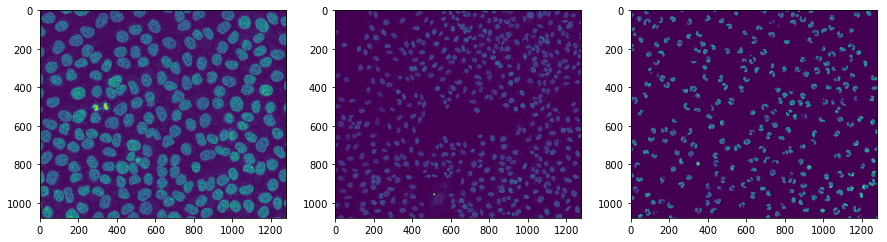

In [23]:
pf, axarr = plt.subplots(1,3)
axarr[0].imshow(img[0])
axarr[1].imshow(img[1])
axarr[2].imshow(img[2])
plt.rcParams['figure.figsize'] = [15, 15]

Load Model weights for the Blurred Border FPN model pre-trained with ImageNet.

In [24]:
%%capture
BLUR_MODEL_URL = 'https://ndownloader.figshare.com/files/22280349?private_link=a3fec498ef6d08ac6973'
BLUR_MODEL_PATH = 'blurred_border_FPN_pretrained.zip'
download_and_unzip_datasets(BLUR_MODEL_URL, BLUR_MODEL_PATH)

modelwtsfname = "./blurred_border_FPN_pretrained.npy"
modeljsonfname = "./blurred_border_FPN_pretrained.json"
gaussian_blur_model = get_model(modeljsonfname,modelwtsfname)

Load Model weights for the Distance Map FPN model pre-trained with ImageNet.

In [25]:
%%capture
DISTANCE_MAP_MODEL_URL = 'https://ndownloader.figshare.com/files/22280352?private_link=5b1454e3f3bd23dea56f'
DISTANCE_MAP_MODEL_PATH = 'distance_map_FPN_pretrained.zip'
download_and_unzip_datasets(DISTANCE_MAP_MODEL_URL, DISTANCE_MAP_MODEL_PATH)
modelwtsfname = "./distance_map_FPN_pretrained.npy"
modeljsonfname = "./distance_map_FPN_pretrained.json"
distance_map_model = get_model(modeljsonfname,modelwtsfname)

Prediction (Instance Segmentation).

In [26]:
%%capture
mask = watershed_infer(img,gaussian_blur_model,distance_map_model,config_file_path)

Plot Output images.

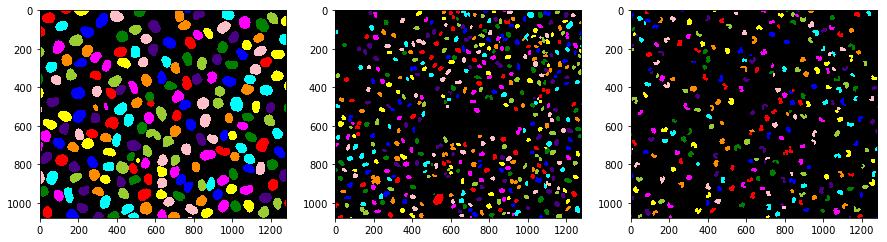

In [28]:
pf, axarr = plt.subplots(1,3)
axarr[0].imshow(label2rgb(mask[0],bg_color=(0, 0, 0),bg_label=0))
axarr[1].imshow(label2rgb(mask[1],bg_color=(0, 0, 0),bg_label=0))
axarr[2].imshow(label2rgb(mask[2],bg_color=(0, 0, 0),bg_label=0))
plt.rcParams['figure.figsize'] = [15, 15]